In [1]:
from glob import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
baseColor = sb.color_palette()[9]

## Read Files

In [2]:
files = glob('../Data/2019/*.csv')
data = [pd.read_csv(f, low_memory=False) for f in files]

In [3]:
data = pd.concat(data, ignore_index=True)

In [4]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [5]:
data.shape

(2506983, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [8]:
data.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

There are some null data but it won't affect our work

In [9]:
data.duplicated().sum()

0

So, we don't have any duplicats 

# Clean Data

In [10]:
df = data.copy()

Drop Some columns to focus on our task

In [11]:
df.drop(columns=['start_station_latitude', 'start_station_longitude',
                 'end_station_latitude', 'end_station_longitude',
                 'start_station_name', 'end_station_name'], inplace=True)

In [12]:
df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
end_station_id               82902
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [13]:
max(df.isna().sum())/df.shape[0]

0.9517994338214499

Rental access column is almost empty, but i will leave it as is for now

# Get Some insights

In [14]:
df.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [15]:
df.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [16]:
df.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

# Get the most out of date column

In [17]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [18]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [19]:
# column for start Date
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
# start hour
df['start_hourofday'] = df.start_time.dt.strftime('%H')
# start day of the week
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
# start month
df['start_month'] = df.start_time.dt.strftime('%B')
# start day of month
df['start_day'] = df.start_time.dt.strftime('%d')
# duration im min
df['duration_min'] = df.duration_sec / 60.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   end_station_id           float64       
 5   bike_id                  int64         
 6   user_type                object        
 7   bike_share_for_all_trip  object        
 8   rental_access_method     object        
 9   start_date               object        
 10  start_hourofday          object        
 11  start_dayofweek          object        
 12  start_month              object        
 13  start_day                object        
 14  duration_min             float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(8)
memory usage: 286.9+ MB


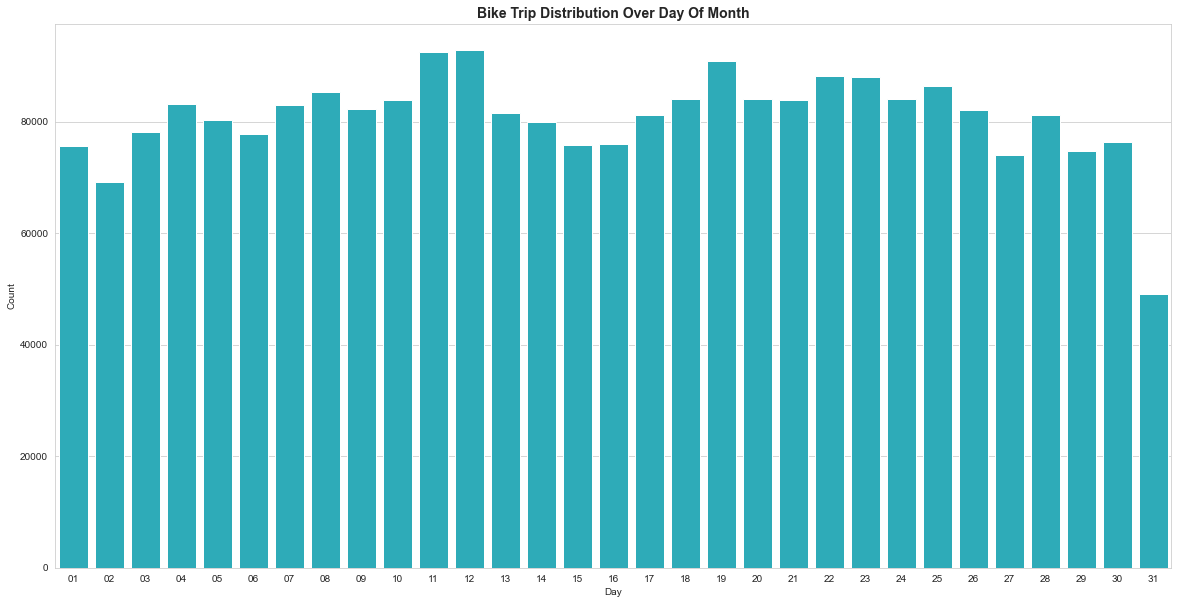

In [21]:
sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_day', color=baseColor);
plt.xlabel('Day');
plt.ylabel('Count');
plt.title('Bike trip distribution over day of month'.title(),fontsize = 14, weight = 'bold');

All days are almost the same except for some increase in 11 and 12

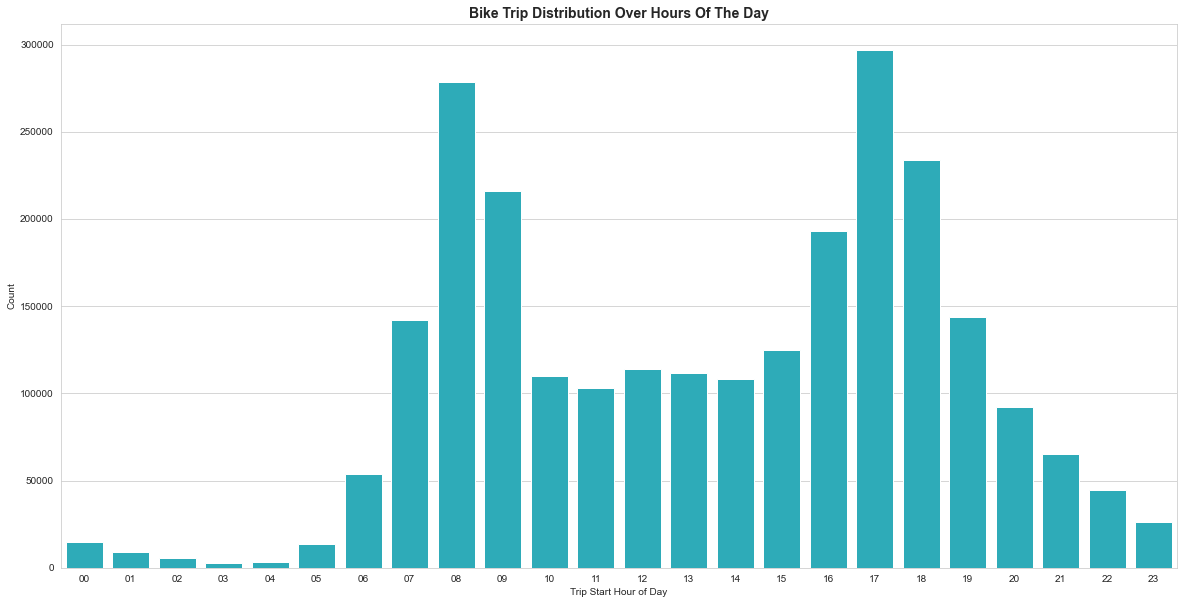

In [22]:
sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_hourofday', color=baseColor);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Bike trip distribution over hours of the day'.title(),fontsize = 14, weight = 'bold');

hours from 23 to 5 are the lowest <br>
8 and 17 are the most common hours to start

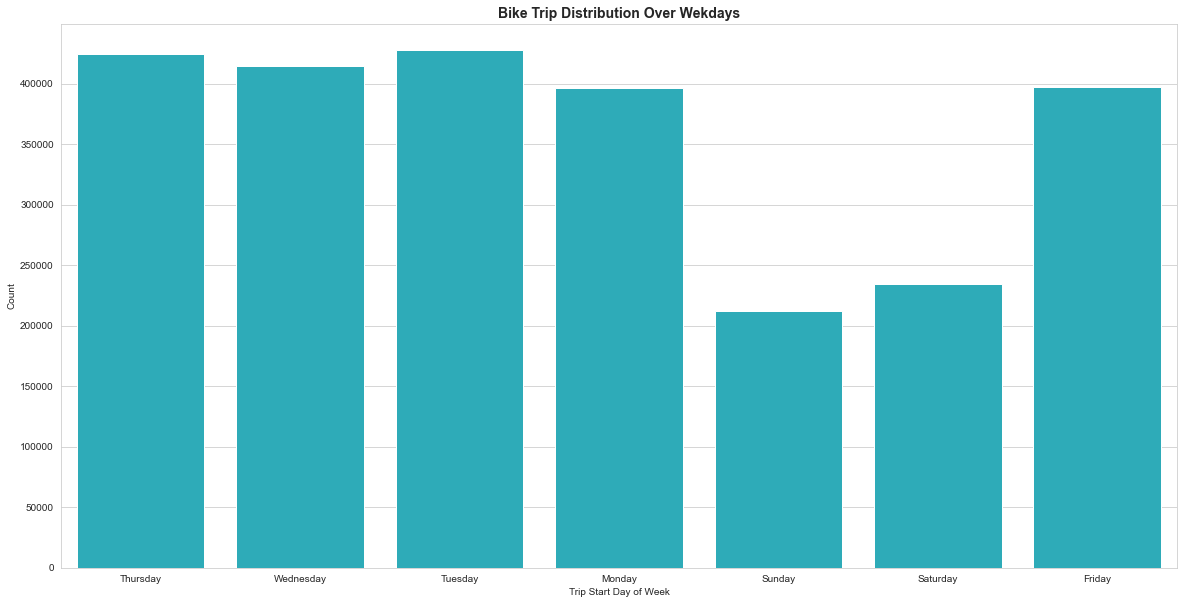

In [23]:
fig, ax = plt.subplots(figsize = [20,10])
sb.countplot(data=df, x='start_dayofweek', color=baseColor);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Bike trip distribution over wekdays'.title(),fontsize = 14, weight = 'bold');

Weekends are the lowest,
May be people use bikes to goto work or thomthing like that !

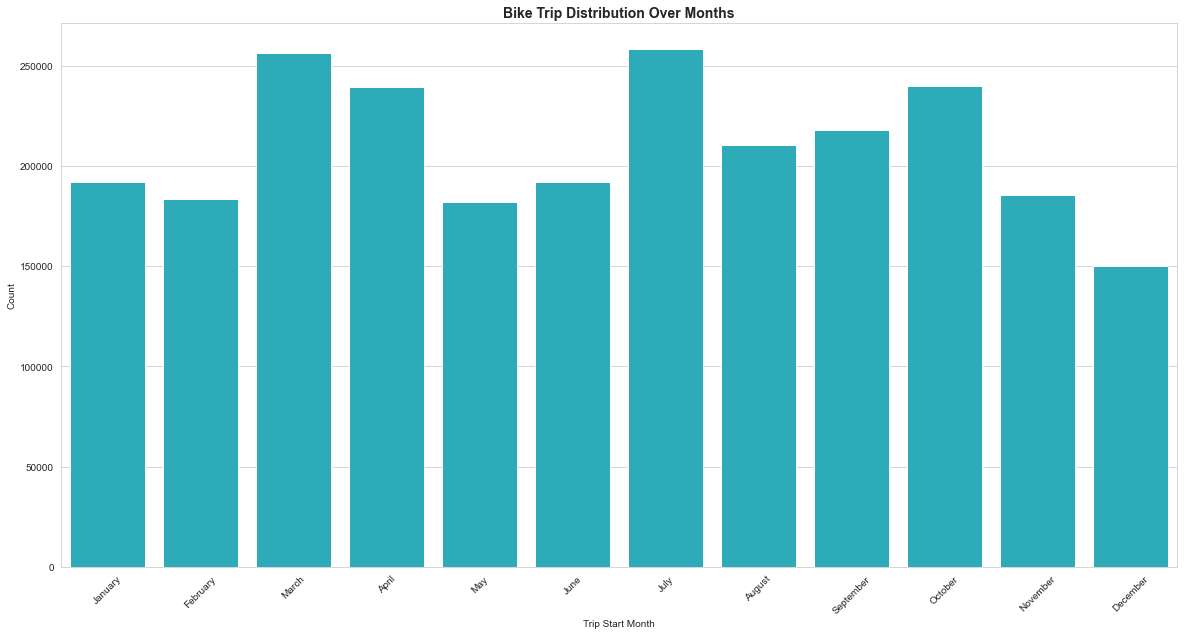

In [24]:
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data=df, x='start_month', color=baseColor);
plt.xticks(rotation=45);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');
plt.title('Bike trip distribution over months'.title(),fontsize = 14, weight = 'bold');

For month-wise march and july have the most numbers

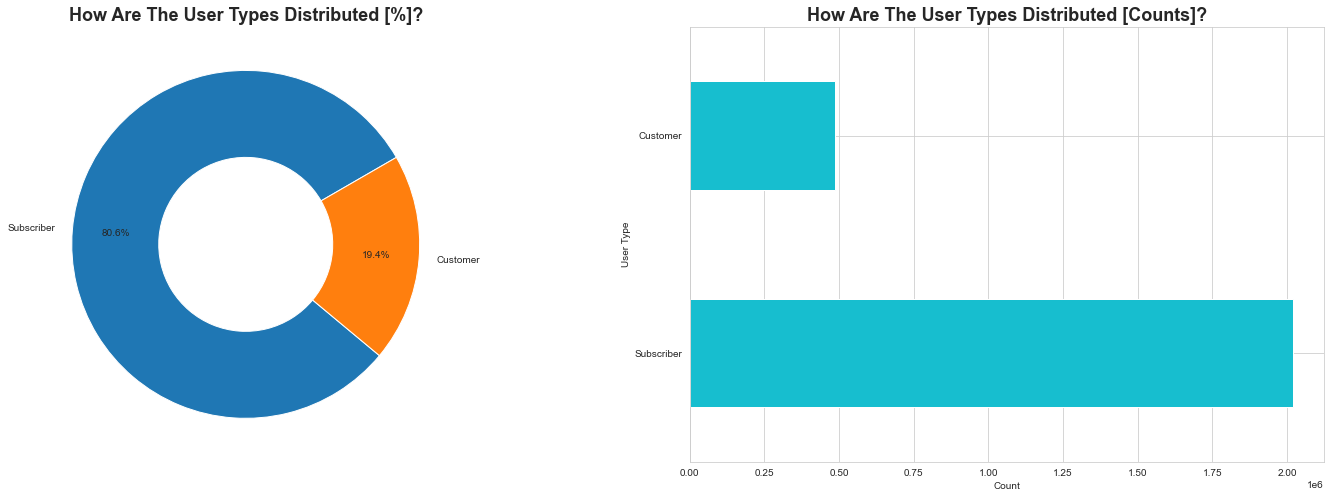

In [25]:
# countplot of user type
sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [25, 8])

plt.subplot(1, 2, 1);
plt.title('How are the User types distributed [%]?'.title(),
          fontsize = 18,
          weight = 'bold');
plt.pie(df['user_type'].value_counts(),
        autopct = '%1.1f%%',
        startangle = 30,
        labels = df['user_type'].value_counts().index,
        pctdistance = 0.75,
        wedgeprops = {'width' : 0.5});

plt.subplot(1, 2, 2);
plt.title('How are the User types distributed [Counts]?'.title(), fontsize=18, weight='bold');
df['user_type'].value_counts().plot(kind='barh', color = baseColor);
plt.xlabel('Count');
plt.ylabel('User Type');

We have 80.6% Subscribers and 19.4% customrs

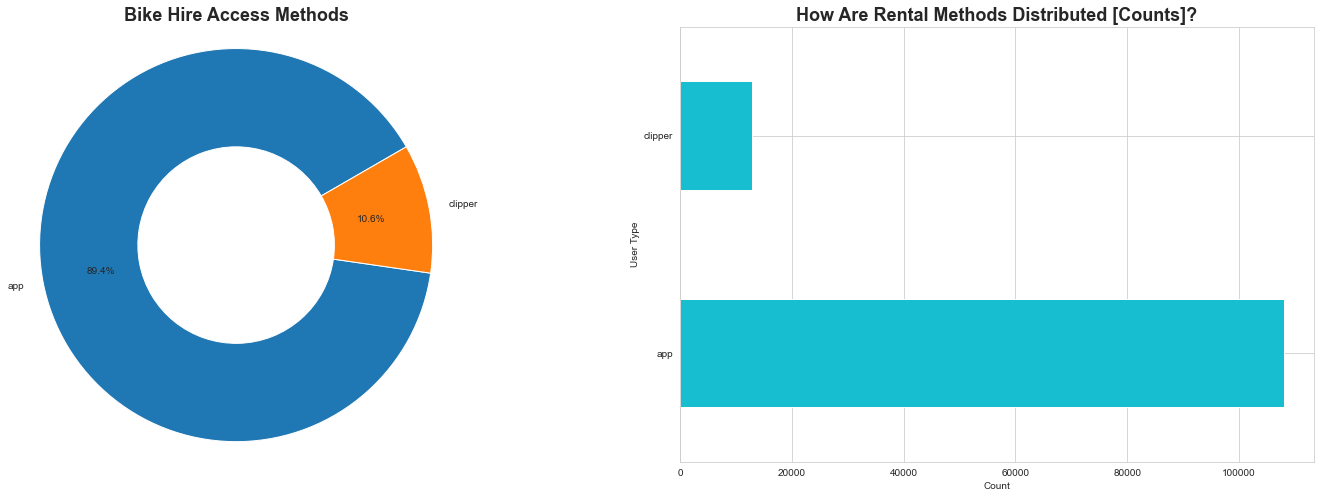

In [26]:
sb.set_style("whitegrid");
fig, ax = plt.subplots(figsize = [25, 8]);

plt.subplot(1, 2, 1);
plt.pie(df['rental_access_method'].value_counts(),
        labels = df['rental_access_method'].value_counts().index,
        autopct = '%1.1f%%',
        startangle = 30,
        pctdistance = 0.7,
        wedgeprops = {'width' : 0.5});
plt.title('Bike Hire Access methods'.title(), fontsize=18, weight='bold');
plt.axis('square');

plt.subplot(1, 2, 2);
plt.title('How are rental Methods distributed [Counts]?'.title(), fontsize=18, weight='bold');
df['rental_access_method'].value_counts().plot(kind='barh', color = baseColor);
plt.xlabel('Count');
plt.ylabel('User Type');

We have 89.4% Subscribers and 10.6% customrs

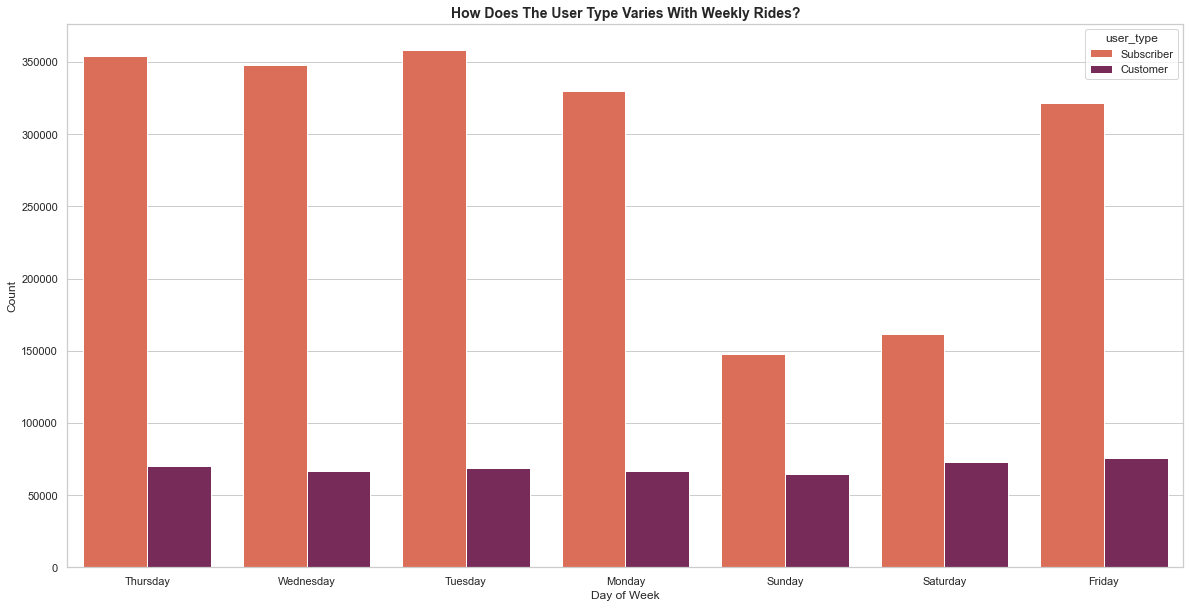

In [64]:
sb.set_style("whitegrid")
sb.set_context('notebook')
fig, ax = plt.subplots(figsize = [20, 10])
sb.countplot(data= df,
             x='start_dayofweek',
             hue='user_type',
             palette='rocket_r');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('How does the user type varies with weekly rides?'.title(),fontsize = 14, weight = 'bold');

Customers seems to be almost constant number through out the week <br>
Subscribers numbers are low in weekends

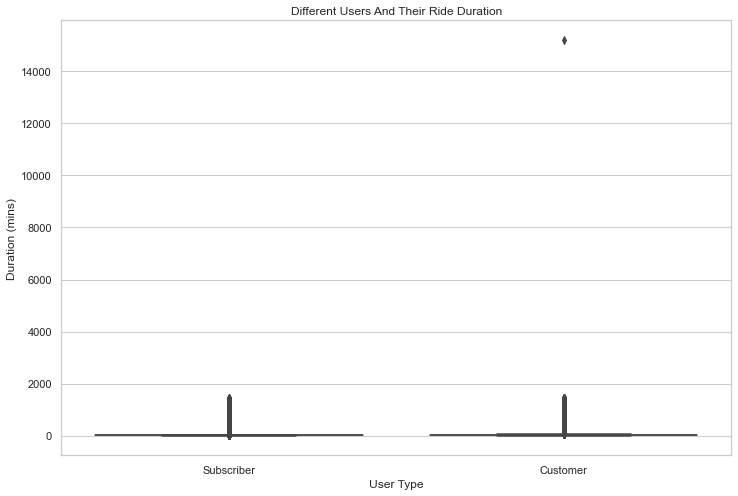

In [31]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df,
           x = 'user_type',
           y = 'duration_min',
           color = baseColor)
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

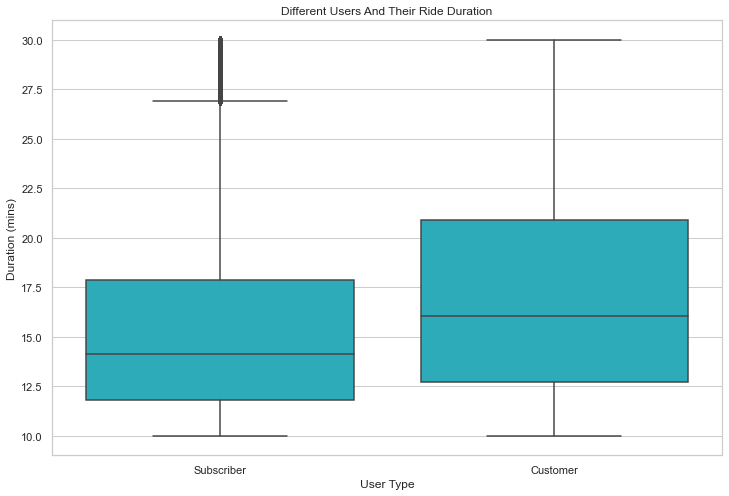

In [32]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df.query('duration_min > 10 and duration_min < 30'),
           x = 'user_type',
           y = 'duration_min',
           color = baseColor)
plt.title('Different Users And Their Ride Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()

In [28]:
# Grouping user types to obtain their counts
customer_data = df.query('user_type == "Customer"')
customer_count = customer_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')
customer_heatmap_pivotdata = customer_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')

suscribers_data = df.query('user_type == "Subscriber"')
suscribers_count = suscribers_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')
suscribers_heatmap_pivotdata = suscribers_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')

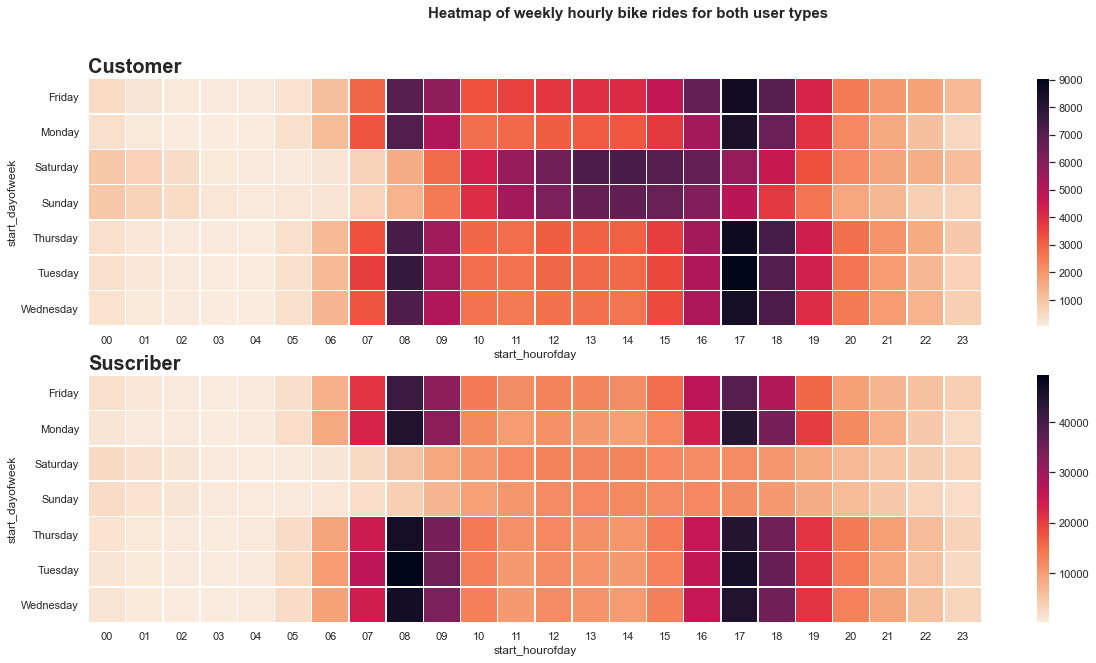

In [62]:
# Show output 
f, ax = plt.subplots(figsize=(20, 10))
plt.suptitle('Heatmap of weekly hourly bike rides for both user types', fontsize = 15, weight = 'bold')
plt.subplot(2, 1, 1)
sb.heatmap(customer_heatmap_pivotdata, cmap='rocket_r',linewidths=.5);
plt.title('Customer', loc='left', fontsize=20, weight='bold');

plt.subplot(2, 1, 2)
sb.heatmap(suscribers_heatmap_pivotdata, cmap='rocket_r',linewidths=.5);
plt.title('Suscriber', loc='left', fontsize=20, weight='bold');

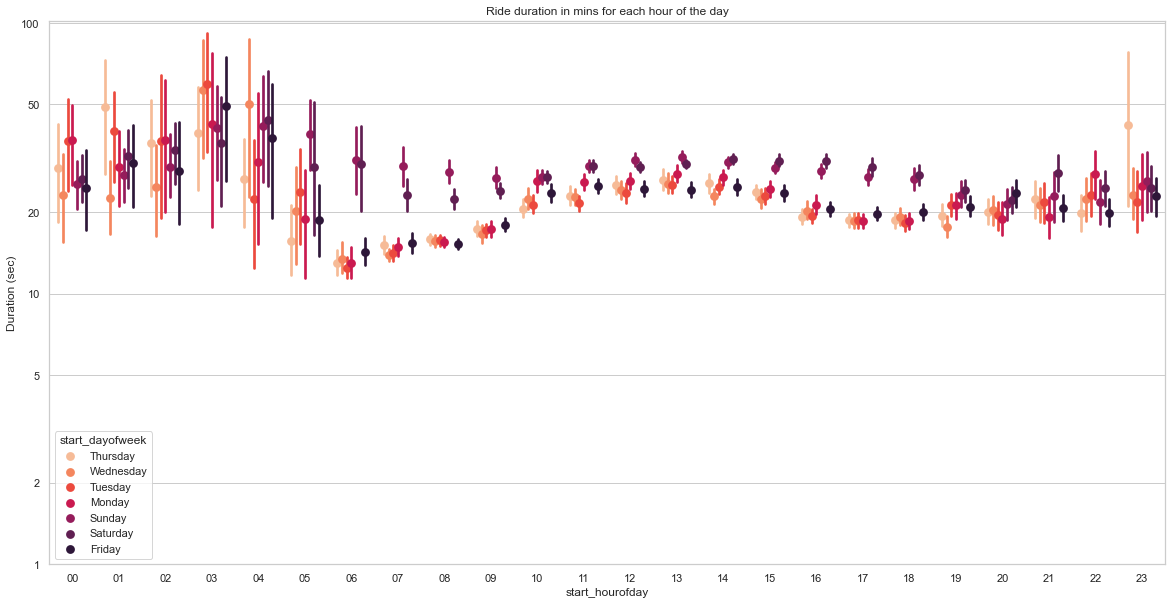

In [71]:
fig = plt.figure(figsize = [20, 10])

ax = sb.pointplot(data=customer_data,
                  x = 'start_hourofday',
                  y = 'duration_min',
                  hue = 'start_dayofweek',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.6);

plt.title('Ride duration in mins for each hour of the day');
plt.ylabel('Duration (sec)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

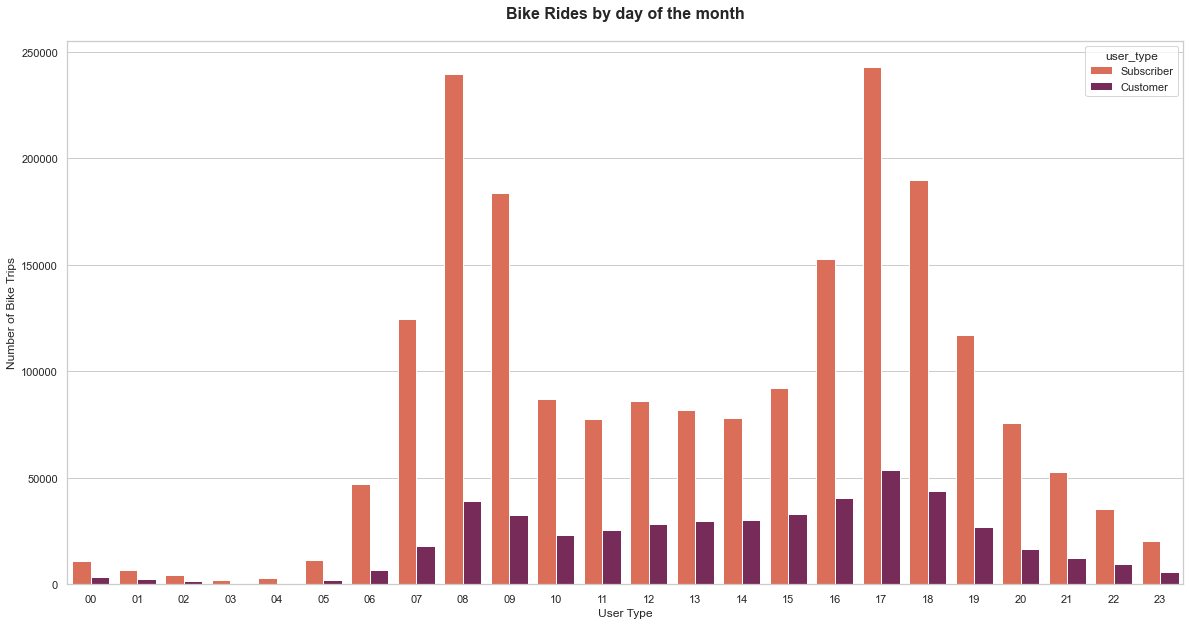

In [63]:
plt.figure(figsize = [20, 10])
graph = sb.countplot(data = df,
                     hue = 'user_type',
                     x = 'start_hourofday',
                     palette = 'rocket_r')
graph.set_xlabel('User Type')
graph.set_ylabel('Number of Bike Trips')
graph.set_title('Bike Rides by day of the month', y=1.03, fontsize=16, fontweight='semibold');

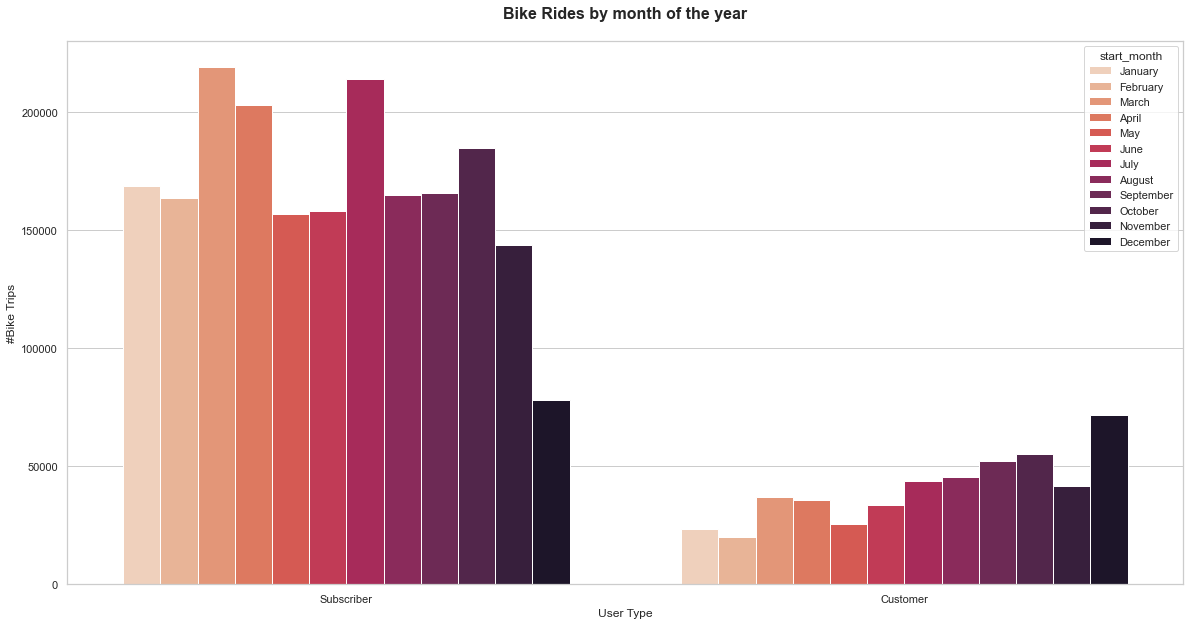

In [55]:
plt.figure(figsize = [20, 10])
graph = sb.countplot(data = df,
                     x = 'user_type',
                     hue = 'start_month',
                     palette = 'rocket_r',
                     order = df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('Bike Rides by month of the year', y=1.03, fontsize=16, fontweight='semibold');

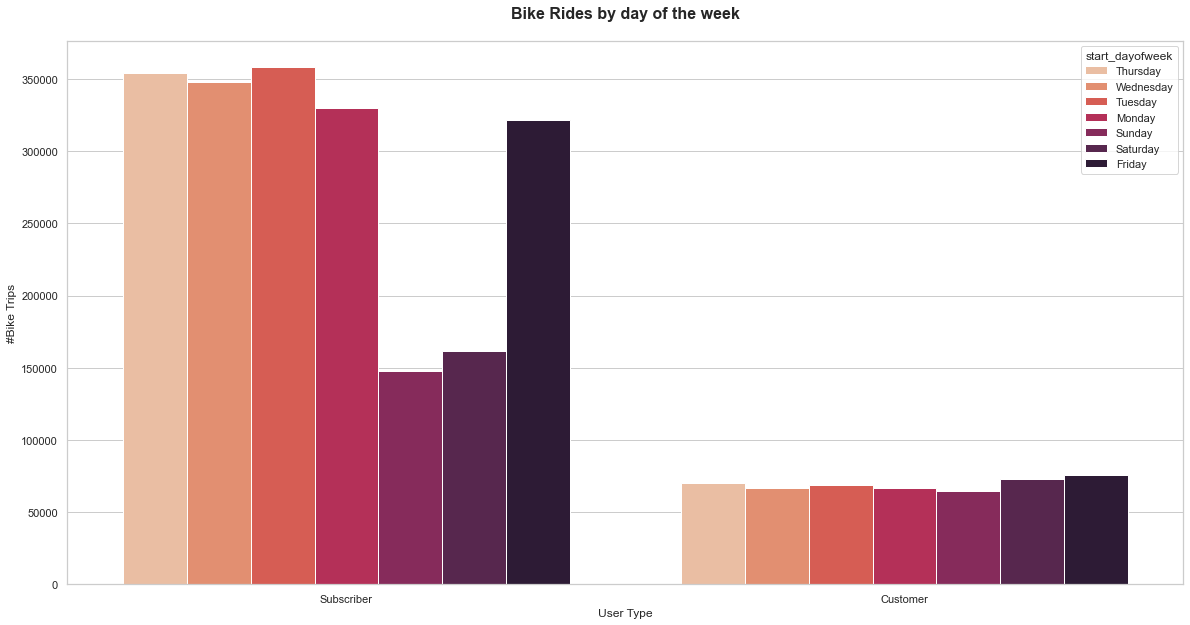

In [77]:
plt.figure(figsize = [20, 10])
graph = sb.countplot(data = df,
                     x = 'user_type',
                     hue = 'start_dayofweek',
                     palette = 'rocket_r',
                     order = df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('#Bike Trips')
graph.set_title('Bike Rides by day of the week', y=1.03, fontsize=16, fontweight='semibold');

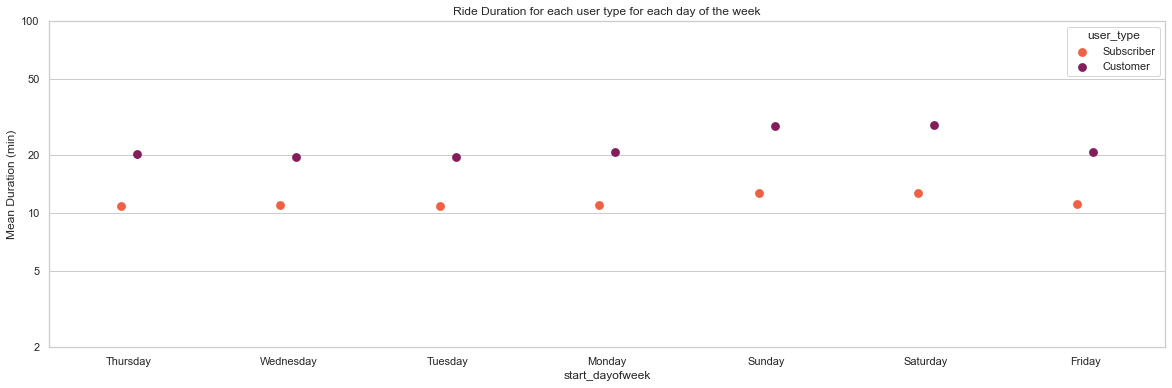

In [59]:
fig = plt.figure(figsize = [20, 6]);
ax = sb.pointplot(data = df,
                  x = 'start_dayofweek',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.1);
plt.title('Ride Duration for each user type for each day of the week');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([2, 5, 10, 20, 50, 100], [2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

Duration almost constant throughout the week for both user types with slight increase in weekends also for both types

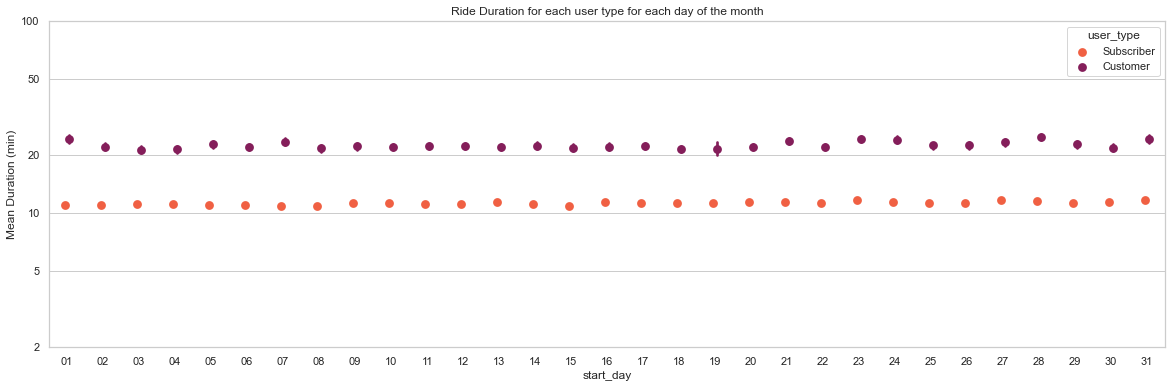

In [73]:
fig = plt.figure(figsize = [20, 6]);
ax = sb.pointplot(data = df,
                  x = 'start_day',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.1);
plt.title('Ride Duration for each user type for each day of the month');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([2, 5, 10, 20, 50, 100], [2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

Nothing different about any day of the month

In [76]:
# Convert notebook to html file
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford2019.ipynb']);
print ('Done Converting to html')

Done Converting to html
